# ペンギンのくちばしの長さと深さによるペンギン種の多値分類モデル

保存用


## データセットの解説

https://www.kaggle.com/datasets/amulyas/penguin-size-dataset/data

このデータセットには、さまざまな島のさまざまな種類のペンギンとそのサイズや性別についてのデータが含まれている。

カテゴリー：

- species → 種
- island → 島
- culmen_length_mm → くちばしの長さ（ミリメートル）
- culmen_depth_mm → くちばしの深さ（ミリメートル）
- flipper_length_mm → ひれの長さ（ミリメートル）
- body_mass_g → 体重（グラム）
- sex → 性別



In [ ]:
%matplotlib inline

# 日本語化ライブラリ導入
!pip install japanize-matplotlib

In [ ]:
# 必要ライブラリの宣言
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#  Numpy変数print時の小数点表示を2桁に設定
np.set_printoptions(
    suppress=True, precision=2, floatmode='fixed'
)

# matplotlib日本語化対応
import japanize_matplotlib

# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14

In [ ]:
# ファンデーションデータセットのロード
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
# 項目名確認
print(df.columns)

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


In [ ]:
# 異常値除去
df = df.dropna(subset=['species'])
df = df.dropna(subset=['culmen_length_mm'])
df = df.dropna(subset=['culmen_depth_mm'])

In [ ]:
# 正解データをAdelie→0、Gentoo→1、Chinstrap→2
df['species'] = df['species'].replace({"Adelie": 0, "Gentoo": 1,"Chinstrap": 2})
# 正解データの取得
y = pd.Series(df.species)
# 正解データの値の分布確認
y.value_counts()

<ipython-input-165-f4f30ef2a9e5>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace({"Adelie": 0, "Gentoo": 1,"Chinstrap": 2})


,count
species,
0,151
1,123
2,68


In [ ]:
# モデル作成に使う2項目の抽出
input_columns = ['culmen_length_mm','culmen_depth_mm']
x_data = df[input_columns].values
y_data = df.species.values

## xの正規化

In [ ]:
# 平均の計算
mean = np.mean(x_data, axis=0)

# 標準偏差の計算
std = np.std(x_data, axis=0)

# 正規化の加工
x2_data = (x_data -mean) / std

# ダミー変数を追加
x3_data = np.insert(x2_data, 0, 1.0, axis=1)

# 結果の確認
print(x3_data[:5])

# 目的変数
print(y_data[:5])

[[ 1.00 -0.88  0.79]
 [ 1.00 -0.81  0.13]
 [ 1.00 -0.66  0.43]
 [ 1.00 -1.32  1.09]
 [ 1.00 -0.85  1.75]]
[0 0 0 0 0]


##yをOne-hot-Vectorに

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False,categories='auto')
y_work = np.c_[y_data]
y_all_one = ohe.fit_transform(y_work)

In [ ]:
# 学習データ、検証データに分割 (シャフルも同時に実施)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, y_train_one, y_test_one = train_test_split(
    x3_data, y_data, y_all_one,train_size=0.7, test_size=0.3,
    random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape, y_train_one.shape, y_test_one.shape)

(239, 3) (103, 3) (239,) (103,) (239, 3) (103, 3)


In [ ]:
# 結果の確認

# yの元データ
print(y_test[:15])

# one hot化後
print(y_test_one[:15])

[2 1 1 1 2 1 1 2 1 0 1 1 1 0 0]
[[0.00 0.00 1.00]
 [0.00 1.00 0.00]
 [0.00 1.00 0.00]
 [0.00 1.00 0.00]
 [0.00 0.00 1.00]
 [0.00 1.00 0.00]
 [0.00 1.00 0.00]
 [0.00 0.00 1.00]
 [0.00 1.00 0.00]
 [1.00 0.00 0.00]
 [0.00 1.00 0.00]
 [0.00 1.00 0.00]
 [0.00 1.00 0.00]
 [1.00 0.00 0.00]
 [1.00 0.00 0.00]]


##学習データのグループ分け

In [ ]:
# x_trainのデータをy_trainの値により3種類に分類
x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
x_t2 = x_train[y_train == 2]

## 散布図表示


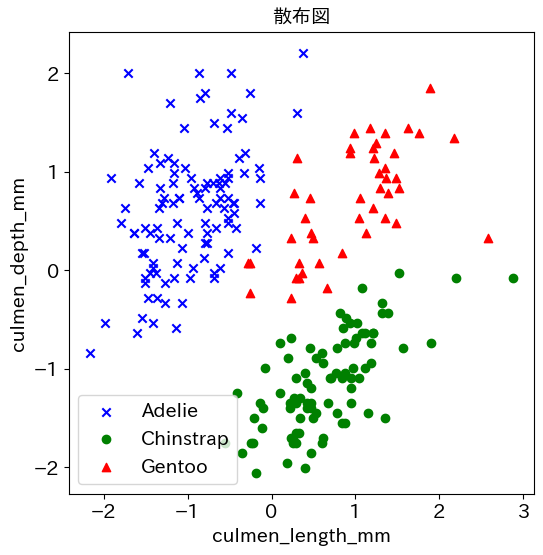

In [ ]:
#散布図表示
plt.figure(figsize=(6,6))
plt.scatter(x_t0[:,1], x_t0[:,2], marker='x', c='b', label='Adelie')
plt.scatter(x_t1[:,1], x_t1[:,2], marker='o', c='g', label='Chinstrap')
plt.scatter(x_t2[:,1], x_t2[:,2], marker='^', c='r', label='Gentoo')
plt.xlabel('culmen_length_mm', fontsize=14)
plt.ylabel('culmen_depth_mm', fontsize=14)
plt.title('散布図', fontsize=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(fontsize=14)
plt.show()

##学習用変数の準備

In [ ]:
# 学習用変数の設定
x = x_train
yt = y_train_one

In [ ]:
# 入力データ x の表示 (ダミーデータを含む)
print(x[:5])

[[ 1.00 -1.47  1.04]
 [ 1.00 -0.85  1.75]
 [ 1.00 -0.52  0.48]
 [ 1.00  0.67 -1.34]
 [ 1.00  1.08 -0.63]]


In [ ]:
# 正解値 yt の表示
print(yt[:5])

[[1.00 0.00 0.00]
 [1.00 0.00 0.00]
 [1.00 0.00 0.00]
 [0.00 1.00 0.00]
 [0.00 1.00 0.00]]


##softmax関数と予測関数の定義

In [ ]:
# softmax関数 (9.7.3)
def softmax(x):
    x = x.T
    x_max = x.max(axis=0)
    x = x - x_max
    w = np.exp(x)
    return (w / w.sum(axis=0)).T
  # 予測値の計算 (9.7.1, 9.7.2)
def pred(x, W):
    return softmax(x @ W)

##評価関数の定義

In [ ]:
# 交差エントロピー関数)(9.5.1)
def cross_entropy(yt, yp):
    return -np.mean(np.sum(yt * np.log(yp), axis=1))

In [ ]:
# モデルの評価を行う関数
from sklearn.metrics import accuracy_score

def evaluate(x_test, y_test, y_test_one, W):

    # 予測値の計算(確率値)
    yp_test_one = pred(x_test, W)

    # 確率値から予測クラス(0, 1, 2)を導出
    yp_test = np.argmax(yp_test_one, axis=1)

    # 損失関数値の計算
    loss = cross_entropy(y_test_one, yp_test_one)

    # 精度の算出
    score = accuracy_score(y_test, yp_test)
    return loss, score

##初期化処理

In [ ]:
# 初期化処理

# 標本数
M  = x.shape[0]
# 入力次元数(ダミー変数を含む
D = x.shape[1]
# 分類先クラス数
N = yt.shape[1]

# 繰り返し回数
iters = 10000

# 学習率
alpha = 0.01

# 重み行列の初期設定(すべて1)
W = np.ones((D, N))

# 評価結果記録用
history = np.zeros((0, 3))

##メイン処理

In [ ]:
#  メイン処理
for k in range(iters):

    # 予測値の計算 (9.7.1)　(9.7.2)
    yp = pred(x, W)

    # 誤差の計算 (9.7.4)
    yd = yp - yt

    # 重みの更新 (9.7.5)
    W = W - alpha * (x.T @ yd) / M

    if (k % 10 == 0):
        loss, score = evaluate(x_test, y_test, y_test_one, W)
        history = np.vstack((history,
            np.array([k, loss, score])))
        print("epoch = %d loss = %f score = %f"
            % (k, loss, score))

epoch = 0 loss = 1.093537 score = 0.873786
epoch = 10 loss = 1.044967 score = 0.873786
epoch = 20 loss = 1.000184 score = 0.873786
epoch = 30 loss = 0.958926 score = 0.883495
epoch = 40 loss = 0.920930 score = 0.883495
epoch = 50 loss = 0.885936 score = 0.883495
epoch = 60 loss = 0.853695 score = 0.883495
epoch = 70 loss = 0.823968 score = 0.883495
epoch = 80 loss = 0.796532 score = 0.883495
epoch = 90 loss = 0.771181 score = 0.883495
epoch = 100 loss = 0.747725 score = 0.883495
epoch = 110 loss = 0.725988 score = 0.883495
epoch = 120 loss = 0.705814 score = 0.883495
epoch = 130 loss = 0.687060 score = 0.893204
epoch = 140 loss = 0.669594 score = 0.893204
epoch = 150 loss = 0.653302 score = 0.893204
epoch = 160 loss = 0.638079 score = 0.893204
epoch = 170 loss = 0.623829 score = 0.902913
epoch = 180 loss = 0.610469 score = 0.902913
epoch = 190 loss = 0.597922 score = 0.902913
epoch = 200 loss = 0.586119 score = 0.902913
epoch = 210 loss = 0.574999 score = 0.902913
epoch = 220 loss = 0.

In [ ]:
# 予測値、正解値、誤差の表示(最初の10要素)
print('予測値:', yp[:10])
print('実測値', yt[:10])
print('誤差', yd[:10])

予測値: [[1.00 0.00 0.00]
 [0.99 0.00 0.01]
 [0.92 0.00 0.07]
 [0.00 0.99 0.01]
 [0.00 0.92 0.08]
 [0.99 0.00 0.01]
 [0.00 0.81 0.19]
 [1.00 0.00 0.00]
 [0.01 0.15 0.85]
 [0.01 0.00 0.99]]
実測値 [[1.00 0.00 0.00]
 [1.00 0.00 0.00]
 [1.00 0.00 0.00]
 [0.00 1.00 0.00]
 [0.00 1.00 0.00]
 [1.00 0.00 0.00]
 [0.00 1.00 0.00]
 [1.00 0.00 0.00]
 [0.00 0.00 1.00]
 [0.00 0.00 1.00]]
誤差 [[-0.00  0.00  0.00]
 [-0.01  0.00  0.01]
 [-0.08  0.00  0.07]
 [ 0.00 -0.01  0.01]
 [ 0.00 -0.08  0.08]
 [-0.01  0.00  0.01]
 [ 0.00 -0.19  0.19]
 [-0.00  0.00  0.00]
 [ 0.01  0.15 -0.15]
 [ 0.01  0.00 -0.01]]


In [ ]:
#損失関数値と精度の確認
print('初期状態: 損失関数:%f 精度:%f'
      % (history[0,1], history[0,2]))
print('最終状態: 損失関数:%f 精度:%f'
      % (history[-1,1], history[-1,2]))

初期状態: 損失関数:1.093537 精度:0.873786
最終状態: 損失関数:0.187860 精度:0.912621


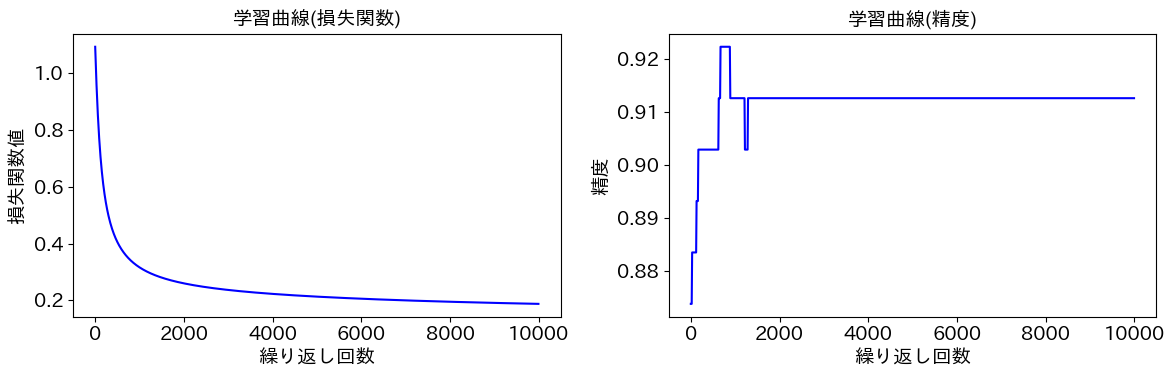

In [ ]:
# 学習曲線の表示をします (損失関数)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history[:, 0], history[:, 1], 'b')
plt.xlabel('繰り返し回数', fontsize=14)
plt.ylabel('損失関数値', fontsize=14)
plt.title('学習曲線(損失関数)', fontsize=14)
plt.subplot(1, 2, 2)
plt.plot(history[:, 0], history[:, 2], 'b')
plt.xlabel('繰り返し回数', fontsize=14)
plt.ylabel('精度', fontsize=14)
plt.title('学習曲線(精度)', fontsize=14)
plt.tight_layout()
plt.show()